In [190]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Bank Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/8/86/World_Bank_logo.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
Open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Literature
U.S. Environmental Protection Agency. 2016.
Climate change indicators in the United States, 2016. Fourth edition. 
EPA 430-R-16-004. 
www.epa.gov/climate-indicators
.

<a title="By Us Government [Public domain], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:CLIMATE_CHANGE_Indicators_in_the_United_States.pdf"><img width="256" alt="CLIMATE CHANGE Indicators in the United States" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/CLIMATE_CHANGE_Indicators_in_the_United_States.pdf/page1-463px-CLIMATE_CHANGE_Indicators_in_the_United_States.pdf.jpg"></a>

# Step 1: Initial exploration of the Dataset

In [191]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [192]:
data = pd.read_csv('C:/Users/peter/Python4DS/W10 - Final Project/world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [193]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [194]:
# select CO2 emissions for France
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'FRA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching France for country code and CO2 emissions over time.
stage = data[mask1 & mask2]

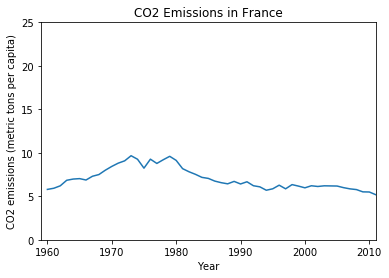

In [195]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in France')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,25])

plt.show()

### Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year

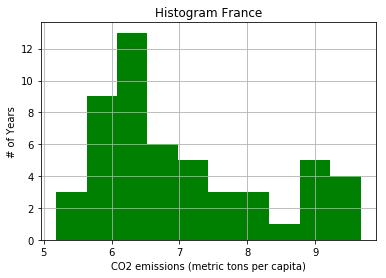

In [196]:
# Otherwise, let's look at all the data
hist_data_FRA = stage['Value'].values
# the histogram of the data
plt.hist(hist_data, 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram France')

plt.grid(True)

plt.show()

In [197]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [198]:
print(len(co2_2011))

232


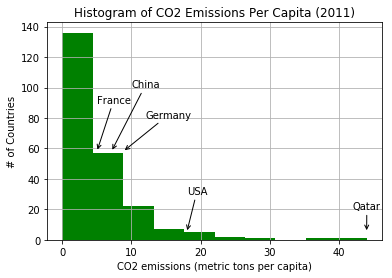

In [199]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
ax.annotate("France",
            xy=(5, 58), xycoords='data',
            xytext=(5, 90), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
ax.annotate("Germany",
            xy=(8.8, 58), xycoords='data',
            xytext=(12, 80), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("China",
            xy=(7.1, 58), xycoords='data',
            xytext=(10, 100), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("Qatar",
            xy=(44, 5), xycoords='data',
            xytext=(42, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita (2011)')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

### Relationship between GPD and CO2 Emissions in France

In [200]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'FRA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [201]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
9627,France,FRA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,11239.278788
34286,France,FRA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,11700.556047


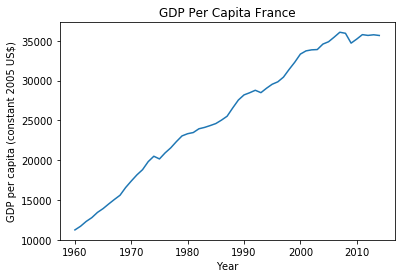

In [202]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita France')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

### ScatterPlot for comparing GDP against CO2 emissions (per capita)


In [203]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [204]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


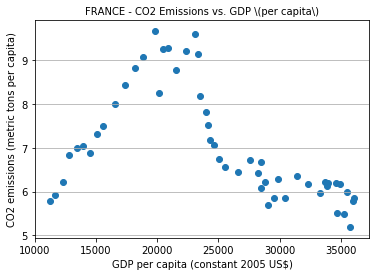

In [205]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('FRANCE - CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship.  We can test this by looking at correlation.

In [206]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[ 1.        , -0.50512269],
       [-0.50512269,  1.        ]])

A negative correlation of -0.51 is very weak